In [ ]:
#################################################################################
#   PROJET 4 - Segmentez des clients d'un site e-commerce                       #
#-------------------------------------------------------------------------------#
#   SIMULATION, POUR DETERMINER LA FREQUENCE NECESSAIRE DE                      #
#   MISE A JOUR DU MODELE DE SEGMENTATION                                       #
#   <=> pour définir le délai de maintenance du modèle (contrat de maintenance) #
#################################################################################

In [ ]:
#############################################################################
# PLAN CODE :                                                               #
#############################################################################
# 1. DONNEES
# 2. EXPLORATION DE TOUTE LA BASE

In [ ]:
# https://stackoverflow.com/questions/71352354/sklearn-kmeans-is-not-working-as-i-only-get-nonetype-object-has-no-attribute
#!pip install numpy --upgrade           # Maj version numpy
#!pip install threadpoolctl --upgrade   # Maj version threadpoolctl

In [1]:
# Data
import pandas as pd
import numpy as np

# Model selection
from sklearn.model_selection import train_test_split

# Clustering
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
from sklearn.cluster import KMeans

# Metrics
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html
from sklearn.metrics import adjusted_rand_score

# Visualisation
# Markers : https://matplotlib.org/stable/api/markers_api.html
import matplotlib.pyplot as plt

# 1. DONNEES

In [2]:
# Constantes
C_DATASET_CLEANED = './data/cleaned/'

In [3]:
################################################
#      Chargement jeu de données               #
################################################
# Données nettoyées
data_customers_orders = pd.read_csv(C_DATASET_CLEANED + 'data_customers_orders_clean.csv', sep = '\t')
data_customers        = pd.read_csv(C_DATASET_CLEANED + 'data_customers_clean.csv', sep = '\t')

data = pd.read_csv(C_DATASET_CLEANED + 'data_customers_RFMSL_1.csv', sep = '\t') # partie de data_customers

print('data_customers_orders shape =', data_customers_orders.shape,
      '\ndata columns =', data_customers_orders.columns)
print('\ndata_customers shape =', data_customers.shape,
      '\ndata columns =', data_customers.columns)

# Données normalisées
print('\ndata shape =', data.shape,
      '\ndata columns =', data.columns)

data_customers_orders shape = (109757, 26) 
data columns = Index(['customer_unique_id', 'order_purchase_timestamp', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value',
       'order_item_id', 'shipping_limit_date', 'price', 'freight_value',
       'product_weight_g', 'distance_client_vendeur_km', 'product_volume_dm3',
       'order_delta_validation_jour',
       'order_delta_livraison_transporteur_jour',
       'order_delta_livraison_client_jour', 'review_delta_client_jour',
       'order_livraison_on_time', 'is_description_produit_importante',
       'is_review_comment_title', 'is_review_comment_title_important',
       'is_review_comment_message', 'is_review_comment_message_important',
       'rayon_index', 'satisfaction_client_index', 'customer_id'],
      dtype='object')

data_customers shape = (88771, 68) 
data columns = Index(['customer_id', 'nb_commandes', 'dernier_achat_recence',
       'nb_articles_sum', 'nb_articles_mean', 'dernier_achat_nb_a

In [4]:
# vérification clés entre les df
count = 0

for index, row in data_customers.iterrows():
    # arrondi à l'entier près (on remplace xxx.0 par xxx)
    customer_id = round(row['customer_id'])
    
#    print(index, customer_id)
    if (index != customer_id):
        count = count + 1
        
if (count == 0):
    print('index = customer_id')
else:
    print('index != customer_id')
    
# => clé commune entre 3 df : 
#     - data_customers_orders : customer_id
#     - data_customers        : customer_id = index
#     - data                  : index

index = customer_id


In [5]:
####################################################
#                      DATA                        #
####################################################
# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
# @ X = données client avec les meilleurs clusters @
# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
X = data
print('data shape\t=', data.shape)


# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
# @ y = identifiant du cluster                     @
# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
# Hyperparamètres K-means
kmeans_kwargs_1 = {'init'        : 'k-means++',  # améliore les résultats par rapport à une initialisation aléatoire
                   'n_init'      : 10,
                   'max_iter'    : 300,
                   'random_state': 42}

cls = KMeans(n_clusters = 4, **kmeans_kwargs_1) # 4 clusters
cls.fit(data)
y = cls.labels_
print('y shape\t\t=', y.shape)

data shape	= (88771, 6)
y shape		= (88771,)


In [6]:
# Trace des 5 premiers éléments (données normalisées)
count = 0 # compteur

for index, row in data.iterrows():
    if (count < 5):
        print('index =', index, ':',
              '\n\tdernier_achat_recence =', row['dernier_achat_recence'],
              ', dernier_achat_nb_articles =', row['dernier_achat_nb_articles'],
              '\n\tmontant_sum =', row['montant_sum'],
              ', is_payment_type_debit_card =', row['is_payment_type_debit_card'],
              '\n\treview_delta_client_jour_mean =', row['review_delta_client_jour_mean'],
              '\n\tdernier_achat_order_delta_livraison_transporteur_jour_sum =',
              row['dernier_achat_order_delta_livraison_transporteur_jour_sum'],          
              '\n\ty =', y[index])
    else:
        break
    count = count + 1

index = 0 : 
	dernier_achat_recence = 1.5330260454416875 , dernier_achat_nb_articles = -0.2455106642990177 
	montant_sum = -0.0974719127974963 , is_payment_type_debit_card = -0.1259398494635336 
	review_delta_client_jour_mean = -0.3981381858223929 
	dernier_achat_order_delta_livraison_transporteur_jour_sum = 1.0712329987355325 
	y = 0
index = 1 : 
	dernier_achat_recence = 0.3714559882479767 , dernier_achat_nb_articles = 1.7482892790262117 
	montant_sum = 0.405860727893116 , is_payment_type_debit_card = -0.1259398494635336 
	review_delta_client_jour_mean = 0.9657994120048988 
	dernier_achat_order_delta_livraison_transporteur_jour_sum = 2.768009491039256 
	y = 3
index = 2 : 
	dernier_achat_recence = 1.5920889297057743 , dernier_achat_nb_articles = -0.2455106642990177 
	montant_sum = -0.1219142549798191 , is_payment_type_debit_card = -0.1259398494635336 
	review_delta_client_jour_mean = 0.9657994120048988 
	dernier_achat_order_delta_livraison_transporteur_jour_sum = 2.485213408988636 
	y 

# 2. EXPLORATION DE TOUTE LA BASE

In [7]:
###############################################################
# Plage de la date d'achat du dataframe data_customers_orders #
###############################################################
# https://stackoverflow.com/questions/23178129/getting-min-and-max-dates-from-a-pandas-dataframe :\n
# date_achat = pd.Timestamp(row['order_purchase_timestamp'])
print('order_purchase_timestamp :\n',
      '\t- min =', data_customers_orders['order_purchase_timestamp'].min(), '\n'
      '\t- max =', data_customers_orders['order_purchase_timestamp'].max())

# 2016 :  3 mois, 
# 2017 : 12 mois, 
# 2018 :  8 mois
# => 23 mois

# Découpage train / test : 
# Les données test sont d'un mois à chaque fois.
# cas 1) train = oct 2016 à décembre 2017 (15 mois / 23) <=> 65% des données dans le train, test = janvier 2018
# cas 2) train = oct 2016 à janvier 2018, test = février 2018
# cas 3) train = oct 2016 à février 2018, test = mars 2018
# cas 4) train = oct 2016 à mars 2018,    test = avril 2018
# cas 5) train = oct 2016 à avril 2018,   test = mai 2018
# cas 6) train = oct 2016 à mai 2018,     test = juin 2018
# cas 7) train = oct 2016 à juin 2018,    test = juillet 2018
# cas 8) train = oct 2016 à juillet 2018, test = août 2018

order_purchase_timestamp :
 	- min = 2016-10-03 09:44:50 
	- max = 2018-08-29 15:00:37


In [8]:
###################################################
# Initialisation date achat 2016-10 --> 2018-08   #
###################################################
date_achat = []

# 2016
date_achat.append('2016-10')
date_achat.append('2016-11')
date_achat.append('2016-12')

# 2017
date_achat.append('2017-01')
date_achat.append('2017-02')
date_achat.append('2017-03')
date_achat.append('2017-04')
date_achat.append('2017-05')
date_achat.append('2017-06')
date_achat.append('2017-07')
date_achat.append('2017-08')
date_achat.append('2017-09')
date_achat.append('2017-10')
date_achat.append('2017-11')
date_achat.append('2017-12')

# 2018
date_achat.append('2018-01')
date_achat.append('2018-02')
date_achat.append('2018-03')
date_achat.append('2018-04')
date_achat.append('2018-05')
date_achat.append('2018-06')
date_achat.append('2018-07')
date_achat.append('2018-08')

# affichage
for i in range(0, len(date_achat)):
    print(i, ':', date_achat[i])
    
print('\nindex 2018-01 =' , date_achat.index('2018-01'))    

0 : 2016-10
1 : 2016-11
2 : 2016-12
3 : 2017-01
4 : 2017-02
5 : 2017-03
6 : 2017-04
7 : 2017-05
8 : 2017-06
9 : 2017-07
10 : 2017-08
11 : 2017-09
12 : 2017-10
13 : 2017-11
14 : 2017-12
15 : 2018-01
16 : 2018-02
17 : 2018-03
18 : 2018-04
19 : 2018-05
20 : 2018-06
21 : 2018-07
22 : 2018-08

index 2018-01 = 15


In [9]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.date_range.html
date_range = pd.date_range(start = '2016-10-01', end = '2016-10-30')
print(date_range)

DatetimeIndex(['2016-10-01', '2016-10-02', '2016-10-03', '2016-10-04',
               '2016-10-05', '2016-10-06', '2016-10-07', '2016-10-08',
               '2016-10-09', '2016-10-10', '2016-10-11', '2016-10-12',
               '2016-10-13', '2016-10-14', '2016-10-15', '2016-10-16',
               '2016-10-17', '2016-10-18', '2016-10-19', '2016-10-20',
               '2016-10-21', '2016-10-22', '2016-10-23', '2016-10-24',
               '2016-10-25', '2016-10-26', '2016-10-27', '2016-10-28',
               '2016-10-29', '2016-10-30'],
              dtype='datetime64[ns]', freq='D')


In [10]:
# https://stackoverflow.com/questions/21378977/how-to-compare-two-timestamps-in-python
# https://docs.python.org/fr/3/library/datetime.html
####################################################
#   Extraction année et mois de la date d'achat.   #
####################################################
def date_achat_annee_mois():
    
    count = 0 # compteur
    
    for index, row in data_customers_orders.iterrows():
        # Date achat. Exemple : 2017-05-16 15:05:35
        date_achat = pd.Timestamp(row['order_purchase_timestamp'])
        
        # Date achat sans heure (type : datetime.date). Exemple : 2017-05-16
        date_achat_sans_heure = date_achat.date()
        
        # Année
        data_customers_orders.loc[index, 'order_purchase_timestamp_year'] = int(date_achat_sans_heure.year)
        # Mois
        data_customers_orders.loc[index, 'order_purchase_timestamp_month'] = int(date_achat_sans_heure.month)
        
        if (count < 5):
            # type artificiellement forcé en entier pour les traces
            print('index =', index, ', customer_unique_id =', row['customer_unique_id'],
                  ', customer_id =', row['customer_id'], 
                  '\n\t - date_achat\t\t\t\t=', date_achat, 
                  '\n\t - date_achat_sans_heure\t\t=', date_achat_sans_heure,
                  '\n\t - order_purchase_timestamp_year\t=', 
                  int(data_customers_orders.loc[index, 'order_purchase_timestamp_year']),
                  '\n\t - order_purchase_timestamp_month\t= ', 
                  int(data_customers_orders.loc[index, 'order_purchase_timestamp_month']))
            
        count = count + 1
    
    # type order_purchase_timestamp_year forcé en entier
    data_customers_orders['order_purchase_timestamp_year'] = \
    data_customers_orders['order_purchase_timestamp_year'].astype(int)
    
    # type order_purchase_timestamp_month forcé en entier
    data_customers_orders['order_purchase_timestamp_month'] = \
    data_customers_orders['order_purchase_timestamp_month'].astype(int)

In [11]:
date_achat_annee_mois()

index = 0 , customer_unique_id = 861eff4711a542e4b93843c6dd7febb0 , customer_id = 0 
	 - date_achat				= 2017-05-16 15:05:35 
	 - date_achat_sans_heure		= 2017-05-16 
	 - order_purchase_timestamp_year	= 2017 
	 - order_purchase_timestamp_month	=  5
index = 1 , customer_unique_id = 9eae34bbd3a474ec5d07949ca7de67c0 , customer_id = 1 
	 - date_achat				= 2017-11-09 00:50:13 
	 - date_achat_sans_heure		= 2017-11-09 
	 - order_purchase_timestamp_year	= 2017 
	 - order_purchase_timestamp_month	=  11
index = 2 , customer_unique_id = 9eae34bbd3a474ec5d07949ca7de67c0 , customer_id = 1 
	 - date_achat				= 2017-11-09 00:50:13 
	 - date_achat_sans_heure		= 2017-11-09 
	 - order_purchase_timestamp_year	= 2017 
	 - order_purchase_timestamp_month	=  11
index = 3 , customer_unique_id = 3c799d181c34d51f6d44bbbc563024db , customer_id = 2 
	 - date_achat				= 2017-05-07 20:11:26 
	 - date_achat_sans_heure		= 2017-05-07 
	 - order_purchase_timestamp_year	= 2017 
	 - order_purchase_timestamp_month	=  5
in

In [12]:
####################################################
# Calcul du dataframe filtré sur une plage de date #
####################################################
def dataframe_filtre_sur_plage_date(start_mois_in, start_annee_in,
                                    end_mois_in, end_annee_in):
    
    lignes_a_supprimer_X = []
    lignes_a_supprimer_y = []
    
    print('plage date\t\t=', start_mois_in, '/', start_annee_in, '-->',
          end_mois_in, '/', end_annee_in)


    #####################################################
    # Filtrage data_customers_orders suivant plage date #
    #####################################################
    # Même année    
    if (start_annee_in == end_annee_in):
        filtered_df = data_customers_orders[(data_customers_orders['order_purchase_timestamp_year'] == start_annee_in) &
                                            (data_customers_orders['order_purchase_timestamp_month'] <= end_mois_in) &
                                            (data_customers_orders['order_purchase_timestamp_month'] >= start_mois_in)]
    # Années différentes, années consécutives
    elif((end_annee_in - start_annee_in) == 1):
        filtered_df = data_customers_orders[# année 1 : start_mois_in --> décembre
                                            ((data_customers_orders['order_purchase_timestamp_year'] == start_annee_in) &
                                             (data_customers_orders['order_purchase_timestamp_month'] >= start_mois_in) &
                                             (data_customers_orders['order_purchase_timestamp_month'] <= 12)) |
                                            # année 2 : janvier --> end_mois_in
                                            ((data_customers_orders['order_purchase_timestamp_year'] == end_annee_in) &
                                             (data_customers_orders['order_purchase_timestamp_month'] <= end_mois_in))]
    # Années différentes, années non consécutives
    else:
        filtered_df = data_customers_orders[# année 1 : 2016
                                            ((data_customers_orders['order_purchase_timestamp_year'] == start_annee_in) &
                                             (data_customers_orders['order_purchase_timestamp_month'] >= start_mois_in) &
                                             (data_customers_orders['order_purchase_timestamp_month'] <= 12)) |
                                            # année 2 : 2017
                                            (data_customers_orders['order_purchase_timestamp_year'] == 2017) |          
                                            # année 3 : 2018
                                            ((data_customers_orders['order_purchase_timestamp_year'] == end_annee_in) &
                                             (data_customers_orders['order_purchase_timestamp_month'] <= end_mois_in))] 
    
    
    filtered_index = filtered_df.index
    filtered_customer_id = filtered_df['customer_id']

    print('filtered_customer_id\t=', len(filtered_customer_id))

    # Nombre de valeurs uniques
    print('customer_id.nunique\t=', filtered_customer_id.nunique())

    # Liste des valeurs uniques
    liste_id_clients = filtered_customer_id.unique()



    #########################################
    #          Filtrage données X           #
    #########################################
    X_filtered = X.copy()

    for index_X in X_filtered.index:
        # On supprime la ligne si elle est absente de la liste des clients
        if (index_X not in liste_id_clients):   
            lignes_a_supprimer_X.append(index_X)

    # Suppression d'une liste de lignes : df.drop([1,5,7,9],0,inplace=True)
    X_filtered.drop(lignes_a_supprimer_X, axis = 0, inplace = True)
        
    print('lignes_a_supprimer_X\t=', len(lignes_a_supprimer_X), ', X_filtered =', len(X_filtered.index),
          '(', len(data), '-', len(lignes_a_supprimer_X), '=', len(data) - len(lignes_a_supprimer_X), ')')



    #########################################
    #          Filtrage données y           #
    #########################################
    y_filtered = y.copy()

    for index_y in range(0, len(y_filtered)):
        # On supprime la ligne si elle est absente de la liste des clients    
        if (index_y not in liste_id_clients):   
            lignes_a_supprimer_y.append(index_y)

    # Suppression d'une liste de lignes : df.drop([1,5,7,9],0,inplace=True)
    y_filtered = np.delete(arr = y_filtered, obj = lignes_a_supprimer_y, axis = 0)

    
    print('lignes_a_supprimer_y\t=', len(lignes_a_supprimer_y), ', y_filtered =', len(y_filtered),
          '(', len(y), '-', len(lignes_a_supprimer_y), '=', len(y) - len(lignes_a_supprimer_y), ')')

    return X_filtered, y_filtered

In [13]:
#############################################
#       Calcul des métriques / ARI          #
#############################################
def metrics(X_train_in, y_train_in, X_test_in, y_test_in):
    
    km = KMeans(n_clusters = 4, **kmeans_kwargs_1) # 4 clusters

    # construction du modèle à partir des données train
    km.fit(X_train_in)
    
    # prédiction données train
    y_train_pred = km.labels_
    
    # prédiction données test
    y_test_pred = km.predict(X_test_in) 

    
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html
    # L'ARI calcule une mesure de similarité entre deux regroupements en considérant toutes les paires d'échantillons
    # et en comptant les paires qui sont attribuées dans le même groupe ou dans des groupes différents dans les 
    # regroupements prédits et vrais.
    ari_test = adjusted_rand_score(labels_true = y_test_in,    # Ground truth class labels to be used as a reference
                                   labels_pred = y_test_pred)  # Cluster labels to evaluate
    
    ari_train = adjusted_rand_score(labels_true = y_train_in,   # Ground truth class labels to be used as a reference
                                    labels_pred = y_train_pred) # Cluster labels to evaluate
    
    return ari_train, ari_test

In [14]:
########################################
#  Calcul données train / test et ARI  #
########################################
# Découpage train / test : 
# 1) DONNEES TRAIN (exemple indice_min_in = indice 14, on a 8 cas) :
#    - Itération 1) train = oct 2016 à décembre 2017 (15 mois / 23) <=> 65% des données dans le train, test = janvier 2018
#    - Itération 2) train = oct 2016 à janvier 2018, test = février 2018
#    - Itération 3) train = oct 2016 à février 2018, test = mars 2018
#    - Itération 4) train = oct 2016 à mars 2018,    test = avril 2018
#    - Itération 5) train = oct 2016 à avril 2018,   test = mai 2018
#    - Itération 6) train = oct 2016 à mai 2018,     test = juin 2018
#    - Itération 7) train = oct 2016 à juin 2018,    test = juillet 2018
#    - Itération 8) train = oct 2016 à juillet 2018, test = août 2018
# 2) DONNEES TEST :
#    Les données test sont d'un mois à chaque fois.
def calcul_train_test_ari(indice_min_in, indice_max_in = 22):

    liste_ari_train = []
    liste_ari_test  = []
    liste_date      = []
    ari_train       = 0
    ari_test        = 0
    # affichage
    liste_ari_train_round = [] # arrondi des valeurs de liste_ari_train
    liste_ari_test_round  = [] # arrondi des valeurs de liste_ari_test
    
    # Affichage courbe
    # On commence la plage des données train de oct 2016 à indice_min_in. Puis on élargit d'un mois à chaque itération.
    for i in range(indice_min_in, indice_max_in):
        end_annee_train = int(date_achat[i][0:4])
        end_mois_train  = int(date_achat[i][5:7])
        
        end_annee_test = int(date_achat[i+1][0:4])
        end_mois_test  = int(date_achat[i+1][5:7])
    
        print('@' * 100,
              '\n', i, ':', date_achat[i], ', end_annee_train =', end_annee_train, ', end_mois_train =', end_mois_train,
              ', end_annee_test =', end_annee_test, ', end_mois_test =', end_mois_test, '\n')

        
        # Données train
        print('\n', '>' * 7, 'DONNEES TRAIN', '<' *7)
        X_train, y_train = dataframe_filtre_sur_plage_date(start_mois_in  = 10, 
                                                           start_annee_in = 2016, 
                                                           end_mois_in    = end_mois_train,
                                                           end_annee_in   = end_annee_train)
        print('X_train.shape =', X_train.shape, ', y_train.shape =', y_train.shape)
        
        
        # Données test (1 mois) : mois suivant le dernier mois de train
        print('\n', '>' * 7, 'DONNEES TEST', '<' *7)              
        X_test, y_test = dataframe_filtre_sur_plage_date(start_mois_in  = end_mois_test, 
                                                         start_annee_in = end_annee_test, 
                                                         end_mois_in    = end_mois_test,
                                                         end_annee_in   = end_annee_test)            
        print('X_test.shape =', X_test.shape, ', y_test.shape =', y_test.shape)


        # Calcul métriques (ARI)
        ari_train, ari_test = metrics(X_train_in = X_train, y_train_in = y_train, 
                                      X_test_in  = X_test,  y_test_in  = y_test)
        print('\ni =', i, ', ari_train =', ari_train, ', ari_test =', ari_test, '\n')
    
        liste_date.append(date_achat)
        liste_ari_train.append(ari_train)
        liste_ari_test.append(ari_test)        
        
    date_achat_ari_train = date_achat[indice_min_in : indice_max_in]
    date_achat_ari_test  = date_achat[indice_min_in + 1 : indice_max_in + 1]
    
    
    # Trace des éléments calculés (qui seront affichés après)
    print('@' * 100,
          '\n', len(date_achat_ari_train), 'éléments date_achat_ari_train :', date_achat_ari_train)
    
    print('\n', len(date_achat_ari_test), 'éléments date_achat_ari_test :', date_achat_ari_test)
    
    # Arrondi des éléments de la liste puis affichage
    for ari_train_ in liste_ari_train:
        liste_ari_train_round.append(round(ari_train_, 3))
    print('\n', len(liste_ari_train_round), 'éléments liste_ari_train_round :', liste_ari_train_round)
    
    # Arrondi des éléments de la liste puis affichage
    for ari_test_ in liste_ari_test:
        liste_ari_test_round.append(round(ari_test_, 3))
    print('\n', len(liste_ari_test_round), 'éléments liste_ari_test_round :', liste_ari_test_round)
    
    return date_achat_ari_train, date_achat_ari_test, liste_ari_train, liste_ari_test

In [15]:
# DONNEES TRAIN / itération 1 : 2016-10 (indice 0) --> 2017-02 (indice 4)
date_achat_ari_train_4, date_achat_ari_test_4, liste_ari_train_4, liste_ari_test_4 = \
calcul_train_test_ari(indice_min_in = 4)

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ 
 4 : 2017-02 , end_annee_train = 2017 , end_mois_train = 2 , end_annee_test = 2017 , end_mois_test = 3 


 >>>>>>> DONNEES TRAIN <<<<<<<
plage date		= 10 / 2016 --> 2 / 2017
filtered_customer_id	= 3107
customer_id.nunique	= 2464
lignes_a_supprimer_X	= 86307 , X_filtered = 2464 ( 88771 - 86307 = 2464 )
lignes_a_supprimer_y	= 86307 , y_filtered = 2464 ( 88771 - 86307 = 2464 )
X_train.shape = (2464, 6) , y_train.shape = (2464,)

 >>>>>>> DONNEES TEST <<<<<<<
plage date		= 3 / 2017 --> 3 / 2017
filtered_customer_id	= 2904
customer_id.nunique	= 2363
lignes_a_supprimer_X	= 86408 , X_filtered = 2363 ( 88771 - 86408 = 2363 )
lignes_a_supprimer_y	= 86408 , y_filtered = 2363 ( 88771 - 86408 = 2363 )
X_test.shape = (2363, 6) , y_test.shape = (2363,)

i = 4 , ari_train = 0.40391418879897295 , ari_test = 0.42080360691771435 

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@


i = 12 , ari_train = 0.5892403282820304 , ari_test = 0.7207485515741273 

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ 
 13 : 2017-11 , end_annee_train = 2017 , end_mois_train = 11 , end_annee_test = 2017 , end_mois_test = 12 


 >>>>>>> DONNEES TRAIN <<<<<<<
plage date		= 10 / 2016 --> 11 / 2017
filtered_customer_id	= 43702
customer_id.nunique	= 34950
lignes_a_supprimer_X	= 53821 , X_filtered = 34950 ( 88771 - 53821 = 34950 )
lignes_a_supprimer_y	= 53821 , y_filtered = 34950 ( 88771 - 53821 = 34950 )
X_train.shape = (34950, 6) , y_train.shape = (34950,)

 >>>>>>> DONNEES TEST <<<<<<<
plage date		= 12 / 2017 --> 12 / 2017
filtered_customer_id	= 6110
customer_id.nunique	= 5155
lignes_a_supprimer_X	= 83616 , X_filtered = 5155 ( 88771 - 83616 = 5155 )
lignes_a_supprimer_y	= 83616 , y_filtered = 5155 ( 88771 - 83616 = 5155 )
X_test.shape = (5155, 6) , y_test.shape = (5155,)

i = 13 , ari_train = 0.6421070752419761 , ari_test = 0.4840

lignes_a_supprimer_X	= 82765 , X_filtered = 6006 ( 88771 - 82765 = 6006 )
lignes_a_supprimer_y	= 82765 , y_filtered = 6006 ( 88771 - 82765 = 6006 )
X_test.shape = (6006, 6) , y_test.shape = (6006,)

i = 21 , ari_train = 0.36778643691240115 , ari_test = 0.7513916898395024 

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ 
 18 éléments date_achat_ari_train : ['2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07']

 18 éléments date_achat_ari_test : ['2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08']

 18 éléments liste_ari_train_round : [0.404, 0.553, 0.554, 0.757, 0.746, 0.625, 0.587, 0.559, 0.589, 0.642, 0.606, 0.488, 0.461, 0.437, 0.398, 0.376, 0.3

In [16]:
# DONNEES TRAIN / itération 1 : 2016-10 (indice 0) --> 2017-07 (indice 9)
date_achat_ari_train_9, date_achat_ari_test_9, liste_ari_train_9, liste_ari_test_9 = \
calcul_train_test_ari(indice_min_in = 9)

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ 
 9 : 2017-07 , end_annee_train = 2017 , end_mois_train = 7 , end_annee_test = 2017 , end_mois_test = 8 


 >>>>>>> DONNEES TRAIN <<<<<<<
plage date		= 10 / 2016 --> 7 / 2017
filtered_customer_id	= 20538
customer_id.nunique	= 16527
lignes_a_supprimer_X	= 72244 , X_filtered = 16527 ( 88771 - 72244 = 16527 )
lignes_a_supprimer_y	= 72244 , y_filtered = 16527 ( 88771 - 72244 = 16527 )
X_train.shape = (16527, 6) , y_train.shape = (16527,)

 >>>>>>> DONNEES TEST <<<<<<<
plage date		= 8 / 2017 --> 8 / 2017
filtered_customer_id	= 4784
customer_id.nunique	= 3880
lignes_a_supprimer_X	= 84891 , X_filtered = 3880 ( 88771 - 84891 = 3880 )
lignes_a_supprimer_y	= 84891 , y_filtered = 3880 ( 88771 - 84891 = 3880 )
X_test.shape = (3880, 6) , y_test.shape = (3880,)

i = 9 , ari_train = 0.6249691390030598 , ari_test = 0.757711065199666 

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

lignes_a_supprimer_y	= 82328 , y_filtered = 6443 ( 88771 - 82328 = 6443 )
X_test.shape = (6443, 6) , y_test.shape = (6443,)

i = 17 , ari_train = 0.43712404298225477 , ari_test = 0.7428136127632639 

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ 
 18 : 2018-04 , end_annee_train = 2018 , end_mois_train = 4 , end_annee_test = 2018 , end_mois_test = 5 


 >>>>>>> DONNEES TRAIN <<<<<<<
plage date		= 10 / 2016 --> 4 / 2018
filtered_customer_id	= 80991
customer_id.nunique	= 65225
lignes_a_supprimer_X	= 23546 , X_filtered = 65225 ( 88771 - 23546 = 65225 )
lignes_a_supprimer_y	= 23546 , y_filtered = 65225 ( 88771 - 23546 = 65225 )
X_train.shape = (65225, 6) , y_train.shape = (65225,)

 >>>>>>> DONNEES TEST <<<<<<<
plage date		= 5 / 2018 --> 5 / 2018
filtered_customer_id	= 7820
customer_id.nunique	= 6476
lignes_a_supprimer_X	= 82295 , X_filtered = 6476 ( 88771 - 82295 = 6476 )
lignes_a_supprimer_y	= 82295 , y_filtered = 6476 ( 88771 - 82295

In [17]:
# DONNEES TRAIN / itération 1 : 2016-10 (indice 0) --> 2017-12 (indice 14)
date_achat_ari_train_14, date_achat_ari_test_14, liste_ari_train_14, liste_ari_test_14 = \
calcul_train_test_ari(indice_min_in = 14)

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ 
 14 : 2017-12 , end_annee_train = 2017 , end_mois_train = 12 , end_annee_test = 2018 , end_mois_test = 1 


 >>>>>>> DONNEES TRAIN <<<<<<<
plage date		= 10 / 2016 --> 12 / 2017
filtered_customer_id	= 49812
customer_id.nunique	= 40001
lignes_a_supprimer_X	= 48770 , X_filtered = 40001 ( 88771 - 48770 = 40001 )
lignes_a_supprimer_y	= 48770 , y_filtered = 40001 ( 88771 - 48770 = 40001 )
X_train.shape = (40001, 6) , y_train.shape = (40001,)

 >>>>>>> DONNEES TEST <<<<<<<
plage date		= 1 / 2018 --> 1 / 2018
filtered_customer_id	= 7943
customer_id.nunique	= 6586
lignes_a_supprimer_X	= 82185 , X_filtered = 6586 ( 88771 - 82185 = 6586 )
lignes_a_supprimer_y	= 82185 , y_filtered = 6586 ( 88771 - 82185 = 6586 )
X_test.shape = (6586, 6) , y_test.shape = (6586,)

i = 14 , ari_train = 0.6058620666920718 , ari_test = 0.8517100878276451 

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

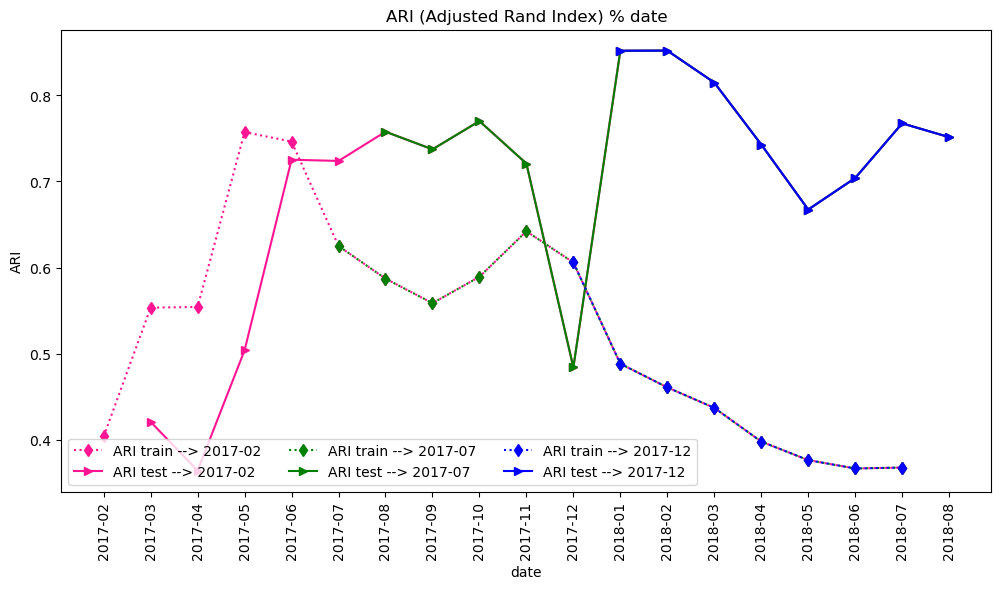

In [18]:
# Affichage courbes
plt.figure(figsize = (12, 6))  # largeur, hauteur

# 2016-10 (indice 0) --> 2017-02 (indice 4)
plt.plot(date_achat_ari_train_4, liste_ari_train_4, marker = 'd', color = 'deeppink', linestyle = 'dotted', \
         linewidth = 1.5, label = 'ARI train --> 2017-02')
plt.plot(date_achat_ari_test_4, liste_ari_test_4, marker = '>', color = 'deeppink', linestyle = '-', \
         linewidth = 1.5, label = 'ARI test --> 2017-02')

# 2016-10 (indice 0) --> 2017-07 (indice 9)
plt.plot(date_achat_ari_train_9, liste_ari_train_9, marker = 'd', color = 'green', linestyle = 'dotted', \
         linewidth = 1.5, label = 'ARI train --> 2017-07')
plt.plot(date_achat_ari_test_9, liste_ari_test_9, marker = '>', color = 'green', linestyle = '-', \
         linewidth = 1.5, label = 'ARI test --> 2017-07')

# 2016-10 (indice 0) --> 2017-12 (indice 14)
plt.plot(date_achat_ari_train_14, liste_ari_train_14, marker = 'd', color = 'blue', linestyle = 'dotted', \
         linewidth = 1.5, label = 'ARI train --> 2017-12')
plt.plot(date_achat_ari_test_14, liste_ari_test_14, marker = '>', color = 'blue', linestyle = '-', \
         linewidth = 1.5, label = 'ARI test --> 2017-12')

plt.xlabel('date')
plt.xticks(rotation = 90) # légende verticale
plt.ylabel('ARI')
plt.title('ARI (Adjusted Rand Index) % date')
plt.legend(ncol = 3, loc = 'best') # légende
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


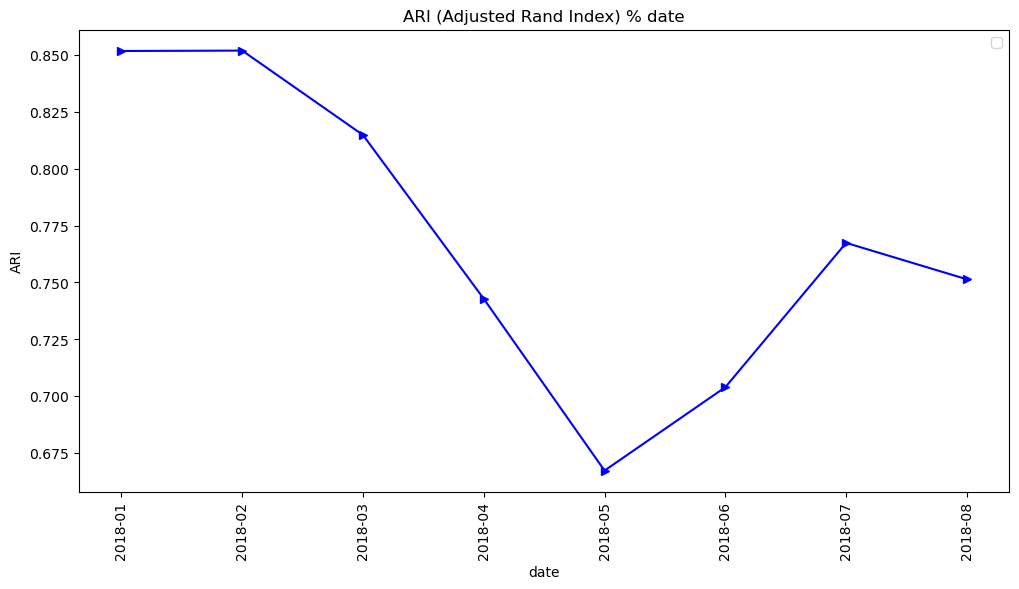

In [20]:
# Affichage courbes
plt.figure(figsize = (12, 6))  # largeur, hauteur

# 2016-10 (indice 0) --> 2017-12 (indice 14)
plt.plot(date_achat_ari_test_14, liste_ari_test_14, marker = '>', color = 'blue', linestyle = '-', \
         linewidth = 1.5)

plt.xlabel('date')
plt.xticks(rotation = 90) # légende verticale
plt.ylabel('ARI')
plt.title('ARI (Adjusted Rand Index) % date')
plt.legend(ncol = 3, loc = 'best') # légende
plt.show()